In [414]:
import numpy as np
import pandas as pd
import scipy.stats as sts
from matplotlib import pyplot as plt
%matplotlib inline
import math
import random

In [486]:
#функция, которая создает массив эксп-распред.
def expon_values_crtr(l, vol):
    """
    l - параметр распределения
    vol - объем выборки
    """
    
    my_distr = sts.expon(l)
    x = my_distr.rvs(size = vol)
    return (x)

#функция, создающая массиив выборок
def array_of_exp_val_crtr(l, vol, n):
    """
    l - параметр распределения
    vol - объем выборки
    n - кол-во необходимых выборок
    **ипользует функцию expon_values_crtr
    """
    df = pd.DataFrame()
    for i in range(n):
        df[i] = expon_values_crtr(l, vol)
    return(df)
array_of_exp_val_crtr(1, 5, 1000)
###################################################################################################################
#######################нахождение теоретических значений, для построения графиков норм. распр.#####################
def sample_expon(value, l, n):
    mu = 1/l
    list_x = []
    for i in range(value):
        summa = 0
        for j in range(n):
            summa += mu**2*random.expovariate(mu)
        list_x.append(summa/n)
    list_x = np.array(list_x)
    return list_x

def normal_pdf(x, mu, sigma):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(-(x-mu) ** 2 / 2 / sigma ** 2)/(sqrt_two_pi * sigma)) 
########################################################################


#функция, создающая массиив средних значений по выборкам
def stats_array_crtr(df):
    volume, samples = df.shape
    df_stats = pd.DataFrame(index = ['mean'])
    
    for i in range(samples):
        df_stats[i] = df[i].mean()
    df_stats = np.array(df_stats)
    df_stats.reshape(1000, 1)
    df_stats = df_stats[0]
    return(df_stats)

#визуализация эксп. распр
def exp_distr_plot(list_x):
#   гистограмма выборки
    fig, axes = plt.subplots(figsize=(10,6))
    plt.hist(list_x,bins = 'auto', color='purple',density = True)

#   график плотности
    axes.set_xlim([list_x.min(), list_x.max()])
    
    sample_for_distr = np.linspace(list_x.min(), list_x.max(), list_x.shape[0])
    plt.plot(sample_for_distr, sts.expon.pdf(sample_for_distr), color='red', lw=5, label='Плотность случайной величины')
    plt.xlabel('Mean')
    plt.ylabel('prob')
    plt.show()

#визуализация ЦПТ
def graph_sample_theory(list_x):
#   гистограмма выборки
    fig, axes = plt.subplots(figsize=(10,6))
    plt.hist(list_x, bins = 10, color='purple',density = True)

#   график плотности
    axes.set_xlim([(list_x.min()*0.9),(list_x.max()*1.1)])
    #axes.set_ylim([0,1])
    plt.plot(np.sort(list_x),[normal_pdf(x, np.mean(list_x), np.std(list_x)) for x in np.sort(list_x)], color='green', lw=4)
    plt.xlabel('Mean')
    plt.ylabel('prob')
    plt.show()
    aprox_df = pd.DataFrame(index = ['Mean', 'Std'])
    aprox_df.loc['Mean', 0] = np.mean(list_x)
    aprox_df.loc['Std', 0] = np.std(list_x)
    print(aprox_df)

In [487]:
stats_array_crtr(array_of_exp_val_crtr(1, 5, 1000))

array([1.97018859, 1.85036828, 1.8871922 , 1.96053225, 1.85651618,
       2.22057596, 1.77752472, 2.34974825, 1.74801759, 1.73264656,
       3.25745402, 1.47789367, 1.79377997, 1.61800344, 1.89848133,
       1.89586326, 1.89703658, 2.3494166 , 2.44088923, 2.89264242,
       1.99859846, 1.3552368 , 1.53064211, 1.96811194, 2.36517576,
       1.96748768, 1.65771071, 1.93047187, 1.56419372, 1.66622626,
       1.60656582, 1.50606338, 1.8440951 , 1.57623189, 1.96888575,
       2.51431727, 2.6791488 , 1.30153658, 2.03474852, 1.35888848,
       1.81297567, 1.42707281, 1.87251591, 1.42437158, 2.50900843,
       1.81142452, 2.28045291, 1.77312633, 2.34822447, 1.66098842,
       1.78143818, 2.32061016, 2.12932704, 2.44459806, 2.33900192,
       2.70107814, 2.54322825, 1.9202037 , 1.92213249, 1.83601279,
       2.23508215, 1.54970466, 1.65575062, 2.05430002, 2.44509477,
       2.03070417, 2.11665474, 2.15187843, 2.71046888, 2.46653468,
       2.04167706, 2.15206094, 1.45124784, 1.98800616, 2.97118

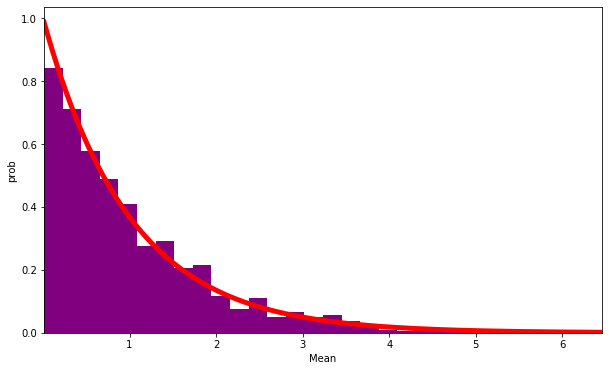

In [488]:
#создание гистограммы эксп.-распр.
def exp_distr_res(l, vol):
    array = pd.Series(expon_values_crtr(l, vol))
    exp_distr_plot(array)
exp_distr_res(0.0125, 1000)

In [489]:
#доказательство цпт
def show_res(l, vol, n):
    df = sample_expon(vol, l, n)
    
    graph_sample_theory(df)

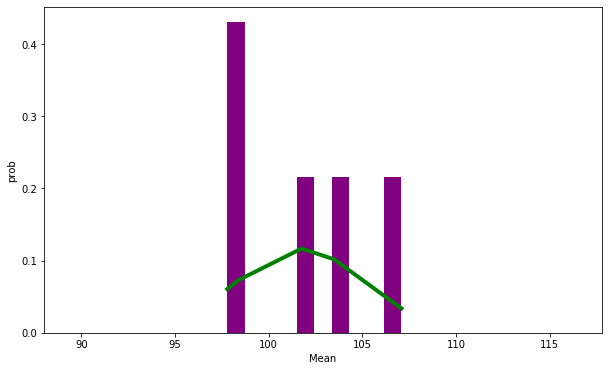

               0
Mean  101.709540
Std     3.418786


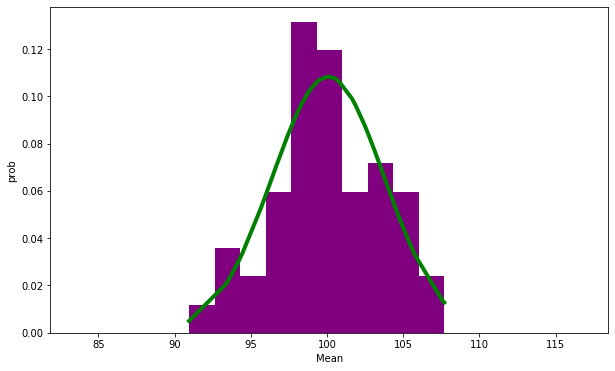

               0
Mean  100.087374
Std     3.685397


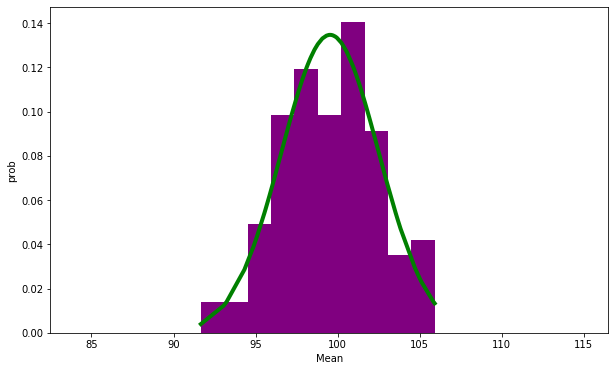

              0
Mean  99.539014
Std    2.963070


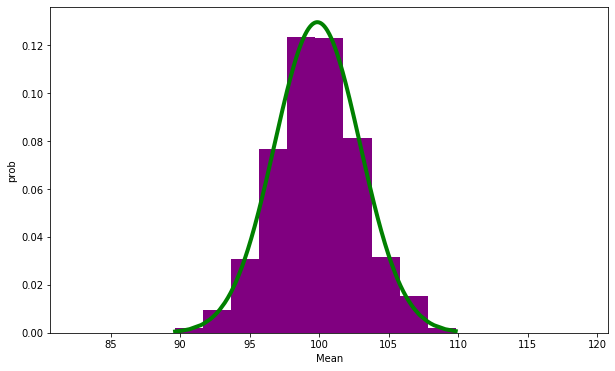

              0
Mean  99.871001
Std    3.078821


In [490]:
volumes = [5, 50, 100, 1000]
for i in volumes:
    show_res(0.01, i, 1000)


Проведя данное исследование, мы действительно увидели, что при увеличении количества элементов в выборке распределение приходит к нормальному. На первой выборке мы можем видеть, что распределние мало похоже на гауссиану, однако при увеличеннии заветная шляпа гарри потера начала вырисовываться.